In [10]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
FILE_NAME = '../tests/data/stats.csv'

### Create a DataFrame from the stats csv file

In [12]:
df = pd.read_csv(FILE_NAME)

### Peeks into the data frame

In [13]:
df.info

<bound method DataFrame.info of       test_case  branching_factor              method_name  total_time  \
0          text                 2  frequency_table_to_heap    0.000016   
1          text                 2             heap_to_tree    0.000047   
2          text                 2                 _heapify    0.000007   
3          text                 2  frequency_table_to_heap    0.000016   
4          text                 2             heap_to_tree    0.000093   
5          text                 2                 _heapify    0.000007   
6          text                 2  frequency_table_to_heap    0.000017   
7          text                 2             heap_to_tree    0.000056   
8          text                 2                 _heapify    0.000007   
9          text                 2  frequency_table_to_heap    0.000016   
10         text                 2             heap_to_tree    0.000045   
11         text                 2                 _heapify    0.000006   
12    

### Retrieve all test cases

In [14]:
test_cases = df['test_case'].unique()
print(test_cases)

['text' 'image']


## Plot Stats per method, per test case

In [15]:
def plot_test_case_stats(df: pd.DataFrame, test_case: str):
    df_test_case = df[df['test_case']==test_case]
    method_names = df_test_case['method_name'].unique()
    
    for method_name in method_names:
        plot_method_stats(df_test_case, method_name)

In [16]:
def plot_method_stats(df: pd.DataFrame, method_name: str, time_field: str = 'total_time'):
    df_method: pd.DataFrame = df[df['method_name']==method_name]
    
    branching_factors = df_method['branching_factor'].unique()
    data = [df_method[df_method['branching_factor']==b][time_field] for b in branching_factors]
    
    fig, axe = plt.subplots()

    axe.set_title(method_name, fontsize=16)
    axe.set_xlabel('branching factor')
    axe.set_ylabel('running time')

    plt.boxplot(data, labels=branching_factors, showfliers=False)
    plt.show()

### Text files

<IPython.core.display.Javascript object>


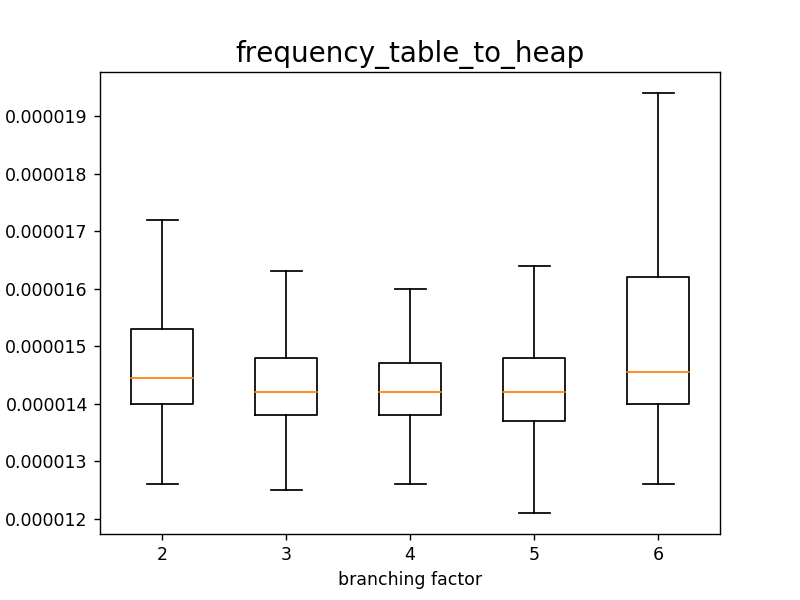

<IPython.core.display.Javascript object>


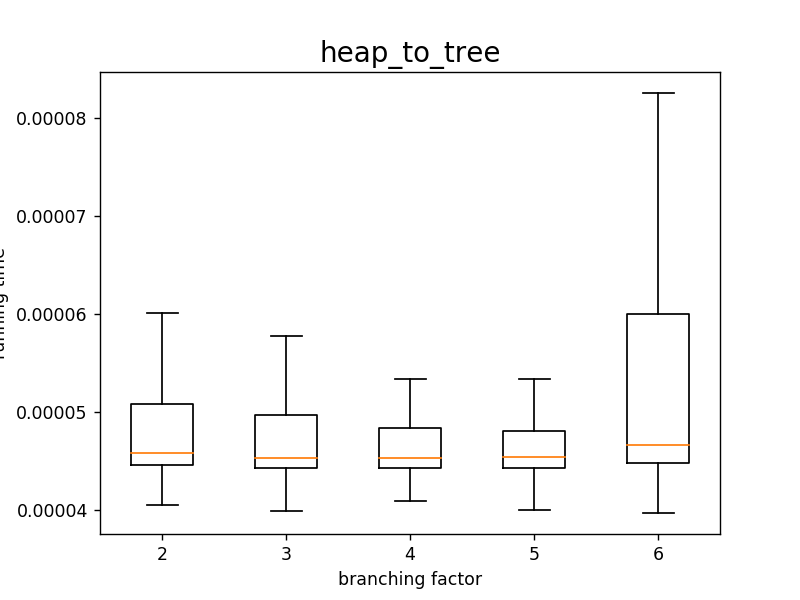

<IPython.core.display.Javascript object>


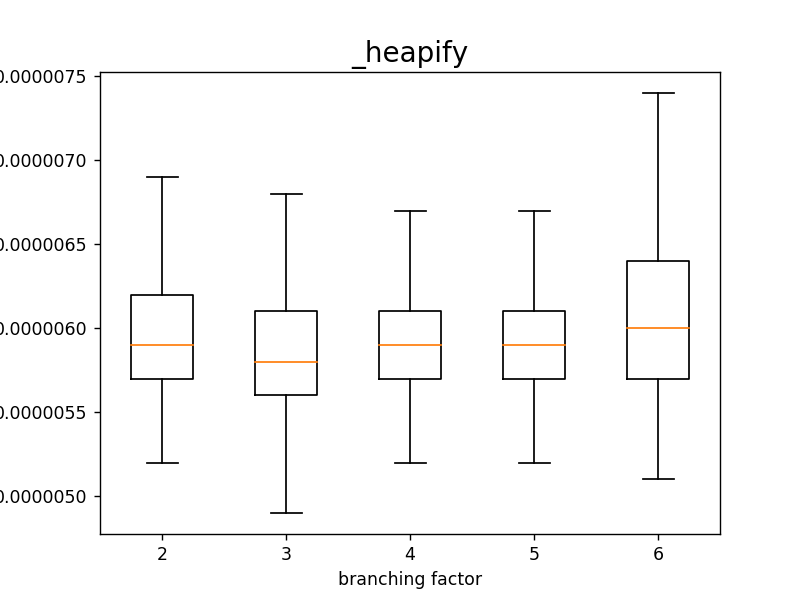

In [17]:
plot_test_case_stats(df, 'text')

### Bitmaps

<IPython.core.display.Javascript object>


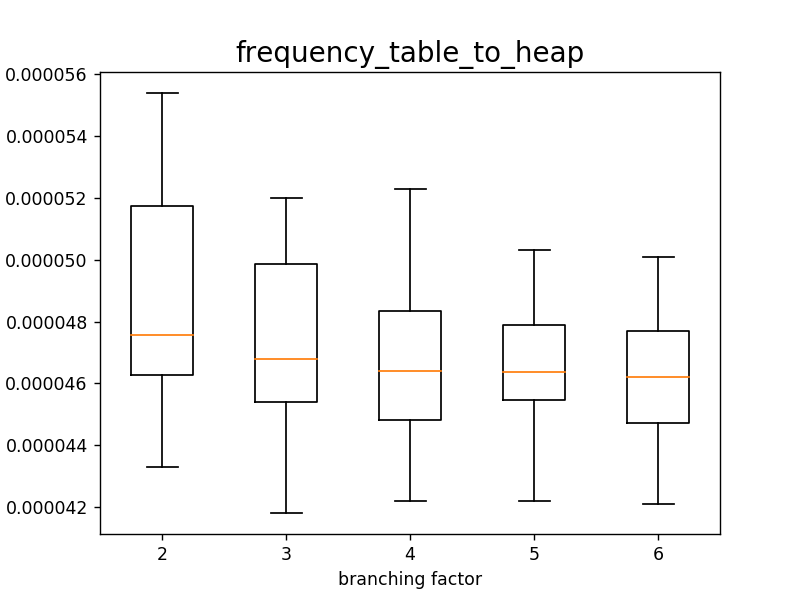

<IPython.core.display.Javascript object>


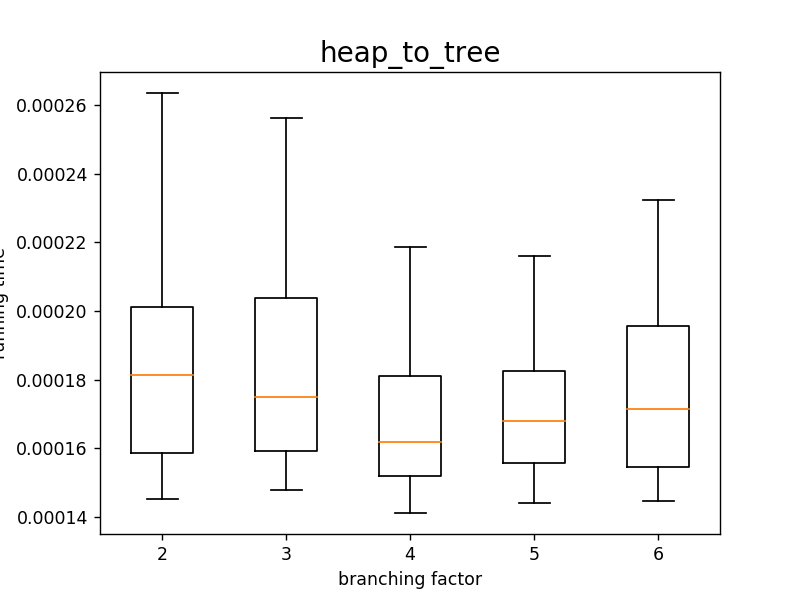

<IPython.core.display.Javascript object>


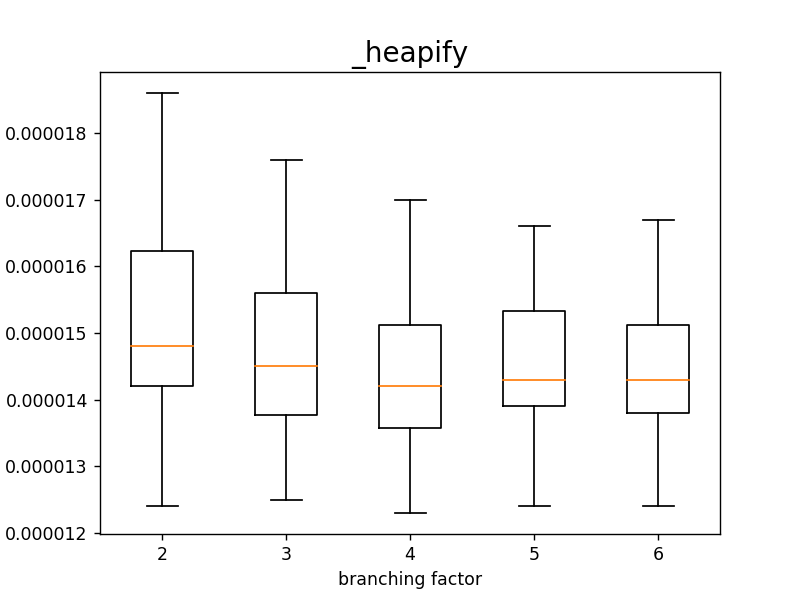

In [18]:
plot_test_case_stats(df, 'image')